In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\hp\OneDrive\Masaüstü\Kaggle\Bank Customer Churn Prediction.csv')

In [3]:
data.isna().sum().sum()
data.isnull().sum().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.drop("customer_id",axis=1,inplace=True)

Chi-squared Test for Independence: 

This test is used to determine if there is a significant 

association between two categorical variables. You can calculate 

the chi-squared statistic and p-value to assess the independence of your 

categorical predictor variables with respect to the target variable.

ANOVA (Analysis of Variance): 
If you have a categorical independent variable with 

multiple levels and a continuous target variable, you can use ANOVA to test if there 

is a statistically significant difference in means between the groups. 

Post-hoc tests may be necessary to determine which specific groups differ.

In [6]:
data.shape

(10000, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: xlabel='churn', ylabel='Count'>

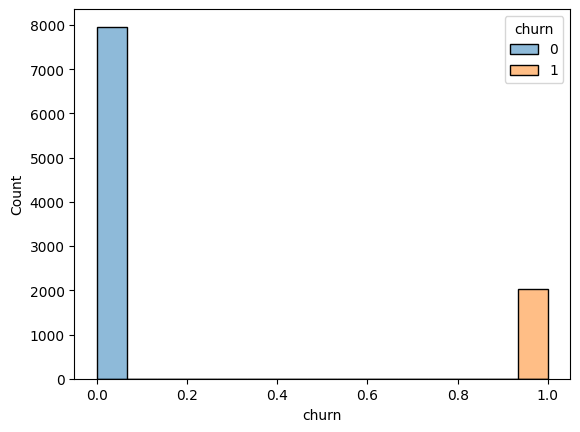

In [8]:
sns.histplot(data=data, x="churn", hue="churn")

In [9]:
data["products_number"].unique()

array([1, 3, 2, 4], dtype=int64)

In [10]:
data["tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [11]:
a=pd.get_dummies(data[["country","gender"]],drop_first=True)

In [12]:
data1=data.copy()

In [13]:
data1.drop(["country","gender"],axis=1,inplace=True)

In [14]:
cols=data1.iloc[0:,0:-1].columns

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df=pd.concat([data1,a],axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=df.drop("churn",axis=1)
y=df["churn"]

In [20]:
x["credit_card"].unique()

array([1, 0], dtype=int64)

<Axes: ylabel='balance'>

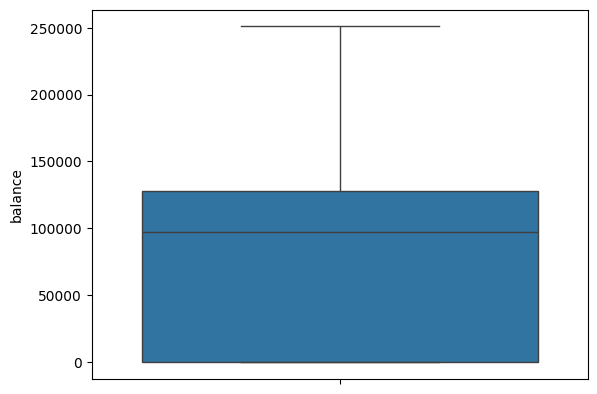

In [21]:
sns.boxplot(data=data1, y="balance")

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=666)

In [24]:
x_train.iloc[0:,0:8].drop(['credit_card',"active_member"],axis=1)

,credit_score,age,tenure,balance,products_number,estimated_salary
4320,701,36,7,95448.32,2,189085.07
5528,645,32,4,0.00,2,97628.08
3552,833,39,3,0.00,2,1710.89
3142,697,76,7,0.00,2,188772.45
8230,758,32,4,162657.64,2,115525.13
...,...,...,...,...,...,...
1469,819,49,1,120656.86,4,166164.30
8262,737,33,4,0.00,2,115115.32
2878,487,36,1,140137.15,1,194073.33
7597,736,29,4,0.00,2,51705.01


In [25]:
x_train.iloc[0:,0:8].drop(['credit_card',"active_member"],axis=1)

,credit_score,age,tenure,balance,products_number,estimated_salary
4320,701,36,7,95448.32,2,189085.07
5528,645,32,4,0.00,2,97628.08
3552,833,39,3,0.00,2,1710.89
3142,697,76,7,0.00,2,188772.45
8230,758,32,4,162657.64,2,115525.13
...,...,...,...,...,...,...
1469,819,49,1,120656.86,4,166164.30
8262,737,33,4,0.00,2,115115.32
2878,487,36,1,140137.15,1,194073.33
7597,736,29,4,0.00,2,51705.01


In [26]:
x_train

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
4320,701,36,7,95448.32,2,1,0,189085.07,1,0,1
5528,645,32,4,0.00,2,0,1,97628.08,0,0,1
3552,833,39,3,0.00,2,1,0,1710.89,0,0,0
3142,697,76,7,0.00,2,0,1,188772.45,0,0,0
8230,758,32,4,162657.64,2,1,1,115525.13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1469,819,49,1,120656.86,4,0,0,166164.30,1,0,0
8262,737,33,4,0.00,2,1,0,115115.32,0,0,0
2878,487,36,1,140137.15,1,1,0,194073.33,0,1,0
7597,736,29,4,0.00,2,0,0,51705.01,0,0,1


In [27]:
col1=x_train.iloc[0:,0:8].drop(['credit_card',"active_member"],axis=1).columns

In [28]:
for i in col1:
    x_train[i]=encoder.fit_transform(x_train[i])

In [29]:
for i in col1:
    x_test[i]=encoder.fit_transform(x_test[i])

In [30]:
x_train

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
4320,309,18,7,987,1,1,0,7543,1,0,1
5528,253,14,4,0,1,0,1,3885,0,0,1
3552,441,21,3,0,1,1,0,73,0,0,0
3142,305,58,7,0,1,0,1,7530,0,0,0
8230,366,14,4,4666,1,1,1,4607,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1469,427,31,1,2559,3,0,0,6599,1,0,0
8262,345,15,4,0,1,1,0,4586,0,0,0
2878,95,18,1,3865,0,1,0,7747,0,1,0
7597,344,11,4,0,1,0,0,2038,0,0,1


In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
model=logmodel.fit(x_train, y_train)

In [32]:
y_predict=model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy:",accuracy_score(y_test,y_predict))
print("Precision:",precision_score(y_test, y_predict))
print("Recall:",recall_score(y_test,y_predict))

Accuracy: 0.8035
Precision: 0.5
Recall: 0.26463104325699743


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      1607
           1       0.50      0.26      0.35       393

    accuracy                           0.80      2000
   macro avg       0.67      0.60      0.62      2000
weighted avg       0.77      0.80      0.78      2000



In [35]:
!pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
!pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [37]:
!pip install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
!pip3 install seaborn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [40]:
!pip3 install xgboost

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [41]:
from xgboost import XGBClassifier

In [42]:
clf=XGBClassifier()

In [43]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_predict=clf.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy:",accuracy_score(y_test,y_predict))
print("Precision:",precision_score(y_test, y_predict))
print("Recall:",recall_score(y_test,y_predict))

Accuracy: 0.8355
Precision: 0.6221374045801527
Recall: 0.41475826972010177


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1607
           1       0.62      0.41      0.50       393

    accuracy                           0.84      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.82      0.84      0.82      2000



In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
}

In [50]:
xgb = XGBClassifier()

In [51]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5)

In [53]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [54]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy Score:  0.8633749999999999


In [55]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.8615


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1607
           1       0.62      0.41      0.50       393

    accuracy                           0.84      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.82      0.84      0.82      2000

